# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №4. Математическая статистика в анализе данных

Задание выполнил(а): Кривоножкина Анна

### Общая информация

__Дата выдачи:__ 22.11.2022

__Дедлайн:__ 04:00 07.12.2022

### Оценивание и штрафы

Каждое задание оценивается в 4 балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{stat}} \times 1/2 ,
$$

где $s_{\text{stat}}$  — количество баллов, которое вы набрали в сумме по всем заданиям.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

В данном домашнем задании вы попрактикуетесь в решении реальных бизнес-задач, связанных с анализом данных и применением методов математической статистики в таких задачах. В данном домашнем задании вам, возможно, понадобится больше чем обычно гуглить и читать различные статьи, получая информацию, при чем не только практического, но и теоретического характера. Это ***нормально*** и как раз поможет разобраться вам в материале, через изучение тех или иных вещей самостоятельно в понятном и комфортном для вас темпе.

Обратите внимание, что фактически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, поскольку большая часть баллов будет выставляться именно за выводы, так как в анализе данных именно они имеют ключевое, итоговое значение и результат. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*. Написанные выводы подтверждайте выполненным кодом программы.

При выполненнии заданий в данном домашнем задании нет никаких ограничений на используемые библиотеки и применяемые вами методы, функционал.

### Задание 1


Проанализировать набор данных и ответить на следующие вопросы:

1) Какой % наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import datasets
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import t, norm
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import levene
from scipy.stats import shapiro
import statsmodels.api as sm
import pylab
from scipy import stats as st

%matplotlib inline



4.987306046493438


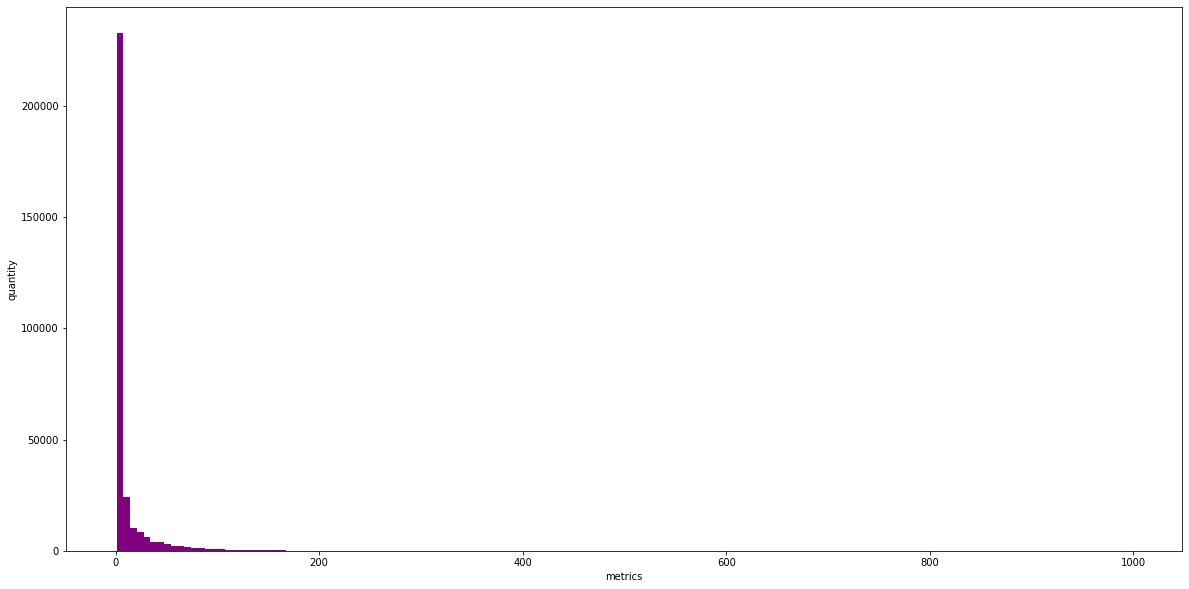

In [ ]:
data1 = pd.read_csv('test_1_1.csv', delimiter=';')
data = data1['metrics']
fig, ax = plt.subplots()
ax = data.hist(bins= 150 , grid= False, color='purple', figsize=[20,10] , rwidth= 50)

ax.set_xlabel('metrics')
ax.set_ylabel('quantity')
a = np.percentile(data, 5)
b = np.percentile(data, 95)
data_new = data[data > a]
data_new = data_new[data_new > b]
print(data_new.shape[0]/data.shape[0]*100)

Перцентиль - это то значение, которое случайная величина не превышает с фиксированной вероятностью, заданной в процентах. Иными словами, 5% перцентиль означает, что 5% наблюдений не превышают какого либо числа из всего массива данных, а 95% перцентиль означает, что 95% наблюдений не превышают какого либо числа из всего массива данных.
Соответственно, 95 % наблюдений выходят за 5-ый перцентиль, а 5 % наблюдений выходят за 95-ый перцентиль.

Информация из википедии по понятию перцентиля:
Например, фраза «90-й процентиль массы тела у новорожденных мальчиков составляет 4 кг» означает, что 90 % мальчиков рождаются с весом, меньшим либо равным 4 кг, а 10 % мальчиков рождаются с весом, большим 4 кг.

С помощью функции np.percentile(data, 5) найдём 5% перцентиль, то есть это будет какое то конкретное число, которое не превышает 5 % данных из всего дата-сета, соответственно так же найдём и 95% перцентиль, далее отфильтруем те значения, которые выходят за 5% перцентиль - это данная функция data_new = data[data > a], и также за 95% перцентиль - data_new = data_new[data_new > b]. Почему мы при второй фильтрации мы используем уже изменённый дата сет? Потому что нам необходимо найти одновременно те значения, которые выходят за 5% перцентиль, то есть они больше (это и есть значение 5% перцентиля) и выходят за 95% перцентиль (то есть они больше 51)

Таким образом, если рассуждать грубо, то ответ в 1 вопросе - это 5%, но проверим эту гипотезу с помощью функции , которая считает само значение процентиля. Количество отфильтрованных ранее значений по перцентилю к количеству всего дата-сета убдет приблизительно = 4,987..., что близко к 5 и подтверждает нашу гипотезу. 

Распределение данных экспоненциальное, так как на построенной гистограмме визуально можно наблюдать именно это распределение.

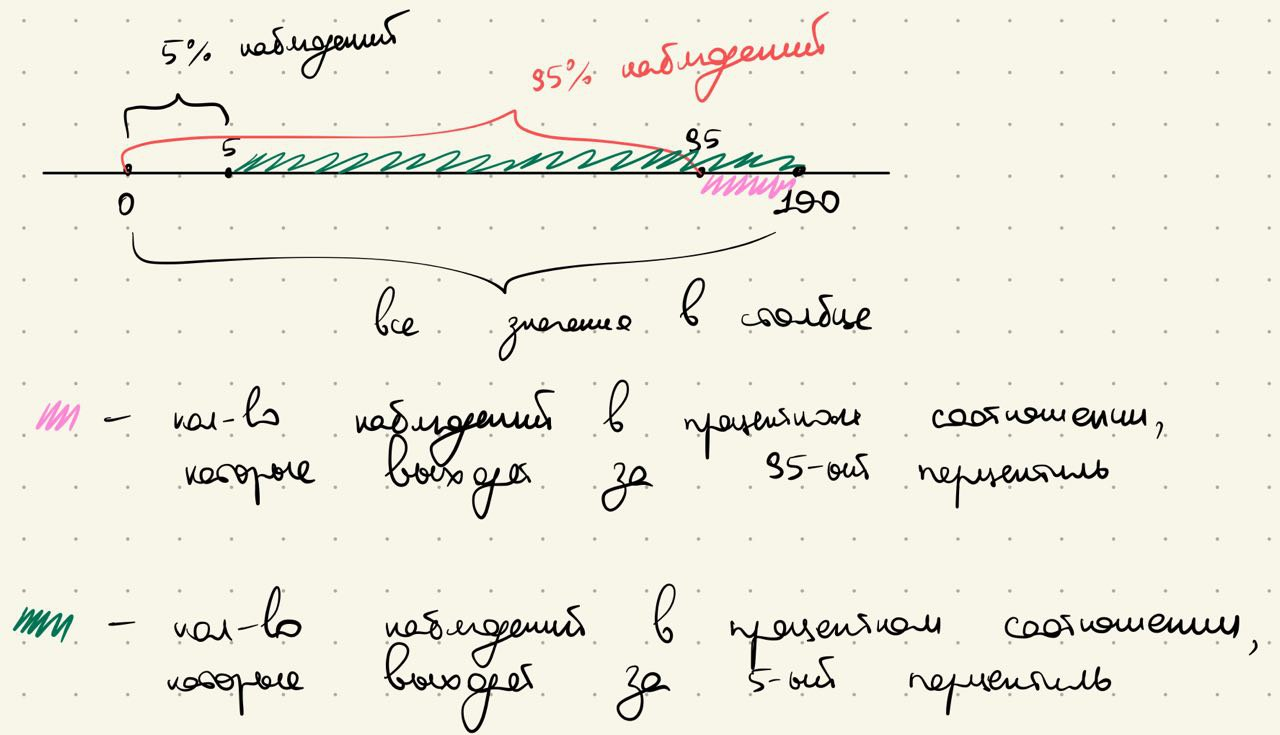

### Задание 2

   Unnamed: 0 variant  metrics
0           1       A        1
1           2       B        1
2           3       A        4
3           4       B       37
4           5       B        4


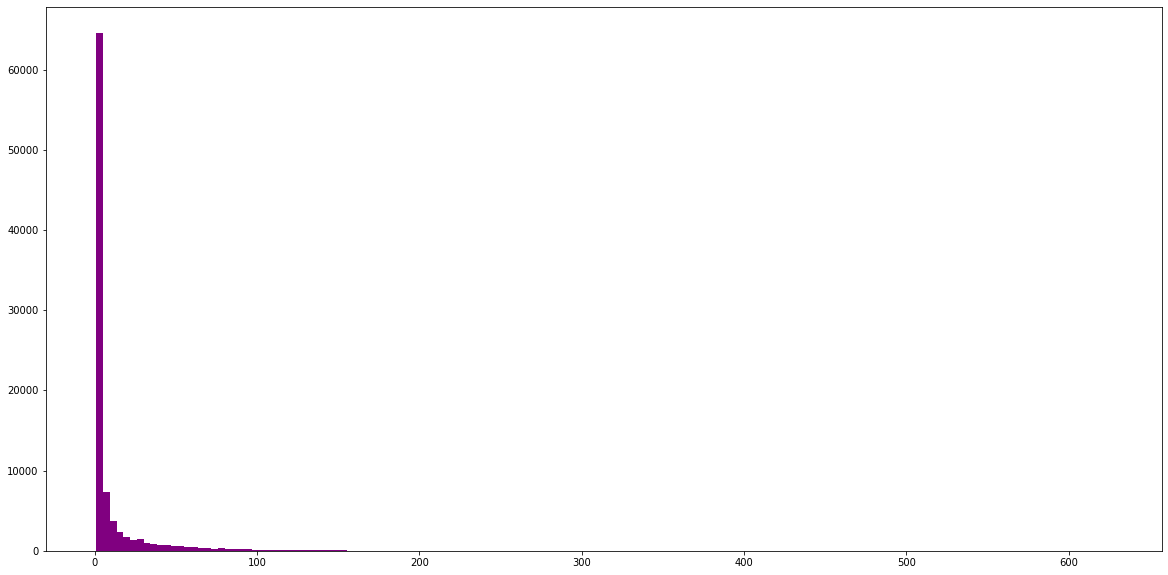

In [ ]:
data2 = pd.read_csv('test_1_2.csv', delimiter=',')
print(data2.head())
data_A = data2[(data2['variant'] == 'A')]
data_B = data2[(data2['variant'] == 'B')]

#print(data_A['metrics'].describe())


fig = plt.figure

#sns.displot(data_A['metrics'],color='blue',label='metrics',ax=ax)
#plt.show()

#ax = data_A['metrics'].hist(bins= 150 , grid= False, color='purple', figsize=[20,10] , rwidth= 50)
#ax = data_B['metrics'].hist(bins= 150 , grid= False, color='purple', figsize=[20,10] , rwidth= 50)
#qqplot(data_A['metrics'])
#pyplot.show
#data_A.head()



Определить, можно ли сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

Решение

Чтобы применять статистические критерии сформулируем задачу. Для того, чтобы ответить на поставленный вопрос, мы будем использовать статистические критерии и каждый раз будем выдвигать две гипотезы H0 и H1, нулевую и альтернативную. 

Теперь задача состоит в том, чтобы на основании какого-то критерия отвергнуть или принять основную нулевую гипотезу при уровне значимости.

Установим уровень значимости alpha=0,05.


Для применения t-критерия Стьюдента данные должны удовлетворять следующим условиям(для несвязных выборок должны выполняться два условия):

1. Гомогенность дисперсий - дисперсии внутри наших групп должны быть приблизительно одинаковыми
2. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)

Проверим сначала на гомогенность дисперсий данные выборки.

Согласно документации, в критерии Левена, нулевой гипотезой является гипотеза о том, что данные выборки удовлетворяют свойству гомогенности дисперсий.



In [ ]:
levene(data_A['metrics'], data_B['metrics'])

LeveneResult(statistic=4.313416821004634, pvalue=0.03781432358426188)

**pvalue** этой гипотезы у нас получилось равно 0.037, что соотвествует 3,7%.
Это значение меньше уровня значимости, установленного нами в 5%, значит мы отвергаем нулевую гипотезу о том, что данные выборки удовлетворяют свойству гомогенности дисперсий и принимаем альтернативную гипотезу о том, что дисперсии сильно отличаются в выборках.



Далее проверим на нормальность распределения

Проверить распределение на нормальность можно:
- визуально с помощью **графика квантиль-квантиль (Q-Q plot)** или
- с помощью **критерия Шапиро-Уилка**

Согласно документации, в критерии Шапиро-Уилка, нулевой гипотезой является гипотеза о том, что данные выборки распределены нормально.



In [ ]:
print(shapiro(data_A['metrics']))
print(shapiro(data_B['metrics']))

ShapiroResult(statistic=0.4299488663673401, pvalue=0.0)
ShapiroResult(statistic=0.45065927505493164, pvalue=0.0)


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**pvalue** этой гипотезы у каждой из групп получилось равно 0.0, что соотвествует 0%. Это значение меньше уровня значимости, установленного нами в 5%, значит мы отвергаем нулевую гипотезу и считаем, что выборки имеют ненормальное распределения.



Построим график qqplot


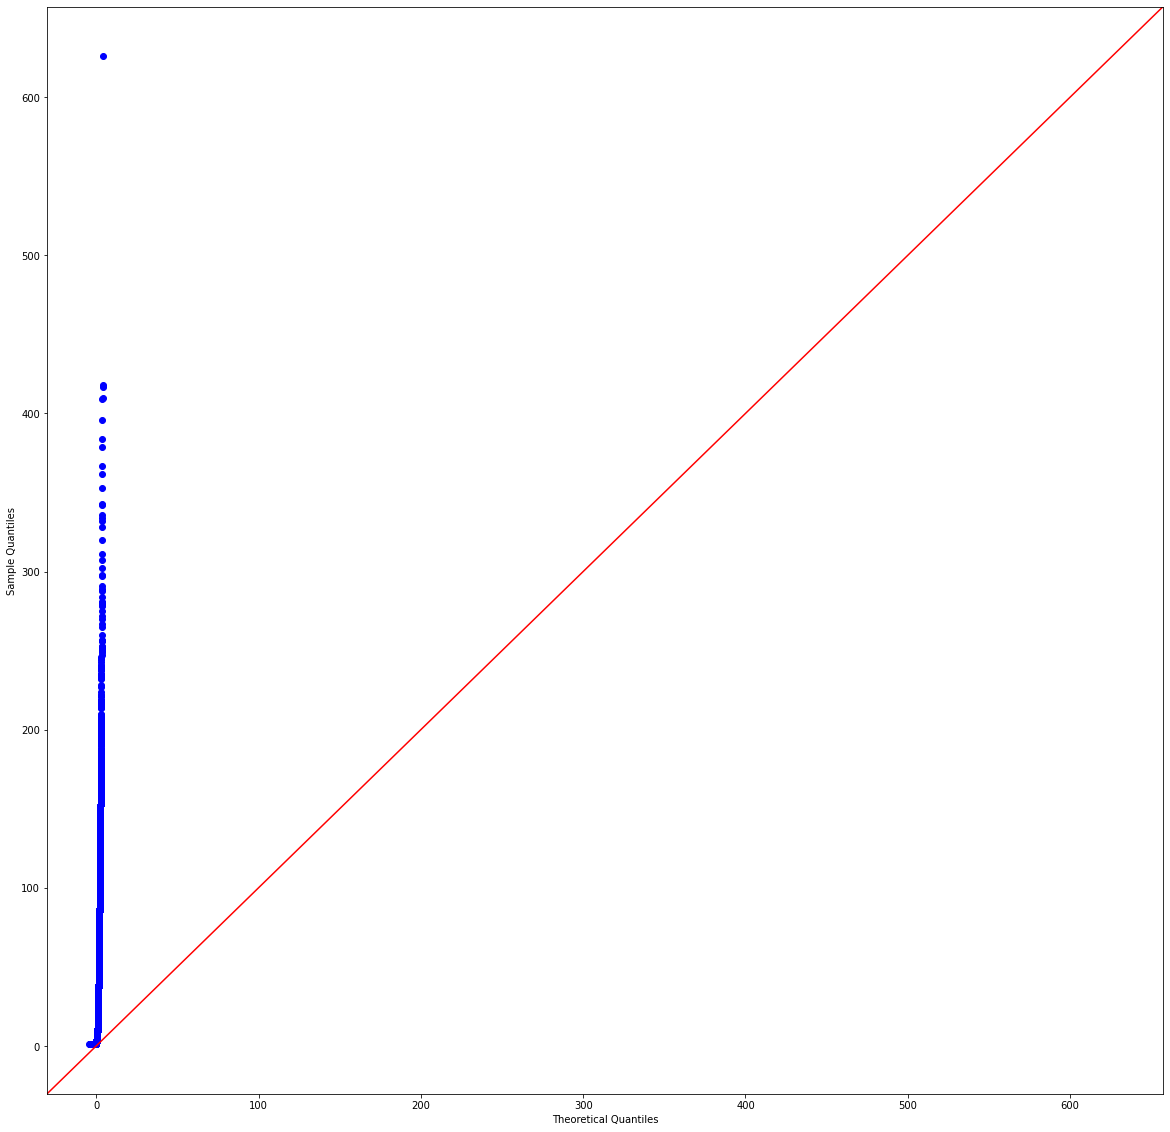

In [ ]:
fig,ax= plt.subplots(figsize=(20,20))
sm.qqplot(data_B['metrics'], line='45', ax=ax,)
#sm.qqplot(data_A['metrics'], line='45', ax=ax) с этими данными тоже похожий график
pylab.show()

Из этого можно сделать вывод, что данные выборки нельзя сравнивать t-критерием Стьюдента. 


Для сравнения двух выборок будем использовать z-test, который можно использовать для того, чтобы сравнить насколько выборочные средние отличаются, когда дисперсии известны, а объемы выборок очень большие(больше 30)

Нулевая гипотеза - различия между выборками отсутствуют

Альтернативная гипотеза - различия между средними двух выборок существенны


In [ ]:
mean_A = data_A['metrics'].mean() # посчитаем среднeе значение в каждой группе
mean_B = data_B['metrics'].mean()
std_A = data_A['metrics'].std()
std_B = data_B['metrics'].std()

# оцениваем стандартную ошибку
se_a = std_A / np.sqrt(data_A.shape[0])
se_b = std_B / np.sqrt(data_B.shape[0])
se_ab = np.sqrt(se_a ** 2 + se_b ** 2)  # стандартная ошибка разности

diff = abs(mean_B - mean_A)       # разность средних значений двух экспериментов
z = diff / se_ab                   # вычисляем z-статистику
z_quantile = st.norm.cdf(z)        # вычисляем квантиль z-статистики
print('diff=%.2f z=%.2f q=%.2f' % (diff, z, z_quantile))

diff=0.23 z=2.18 q=0.99


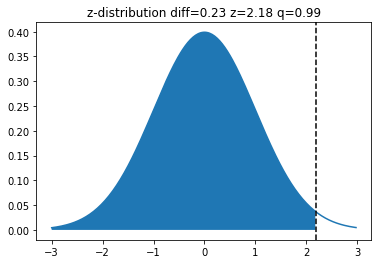

In [ ]:
# Визуализируем z-распределение
x = np.arange(-3, 3, 0.025)
plt.plot(x, st.norm.pdf(x))
plt.axvline(z, color='k', linestyle='--')
plt.fill_between(x, st.norm.pdf(x), where=x<z)
plt.title('z-distribution diff=%.2f z=%.2f q=%.2f' % (diff, z, z_quantile));

Положение z-статистики = 2.18, что > 1.96 при уровне значимости 5 %), значит нулевая гипотеза отвергается, соответственно различия между средними двух выборок существенны

### Задание 3



Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и работу с несбалансированными выборками

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [ ]:
from scipy. stats import expon
data3 = pd.read_csv('test_1_3.csv', delimiter=',')
data3.head()
data_A_3 = data3[(data3['variant'] == 'A')]
data_D_3 = data3[(data3['variant'] == 'D')]


print(data_A_3['metrics'].var(), data_A_3.shape[0])
print(data_D_3['metrics'].var(), data_D_3.shape[0])

print(shapiro(data_A_3['metrics']))
print(shapiro(data_D_3['metrics']))

fig,ax= plt.subplots(figsize=(20,20))
sm.qqplot(data_D_3['metrics'], line='45', ax=ax,)
pylab.show()
#данные в обоих выборках распределены экспоненциально, но количество значений отличается, в первой выборке 92686 значений, а во второй 15413 значений

ax = data_D_3['metrics'].hist(bins= 150 , grid= False, color='purple', figsize=[20,10] , rwidth= 50)

In [ ]:
from collections import namedtuple
import scipy.stats as sps
import statsmodels.stats.api as sms
from tqdm.notebook import tqdm as tqdm_notebook # tqdm – библиотека для визуализации прогресса в цикле
from collections import defaultdict
from statsmodels.stats.proportion import proportion_confint
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, palette='Set2')
ExperimentComparisonResults = namedtuple('ExperimentComparisonResults', 
                                        ['pvalue', 'effect', 'ci_length', 'left_bound', 'right_bound'])

# 2. Создание тестируемого критерия.
def absolute_ttest(control, test):
    mean_control = np.mean(control)
    mean_test = np.mean(test)
    var_mean_control  = np.var(control) / len(control)
    var_mean_test  = np.var(test) / len(test)
    
    difference_mean = mean_test - mean_control
    difference_mean_var = var_mean_control + var_mean_test
    difference_distribution = sps.norm(loc=difference_mean, scale=np.sqrt(difference_mean_var))

    left_bound, right_bound = difference_distribution.ppf([0.025, 0.975])
    ci_length = (right_bound - left_bound)
    pvalue = 2 * min(difference_distribution.cdf(0), difference_distribution.sf(0))
    effect = difference_mean
    return ExperimentComparisonResults(pvalue, effect, ci_length, left_bound, right_bound)

In [ ]:
# 3. Заводим счётчик.
bad_cnt = 0

# 4. Цикл проверки.
N = 100000
for i in tqdm_notebook(range(N)):
    # 4.a. Тестирую A/A-тест.
    control = np.random.choice(data_A_3['metrics'],500 )
    test = np.random.choice(data_A_3['metrics'], 600)

    # 4.b. Запускаю критерий.
    _, _, _, left_bound, right_bound = absolute_ttest(control, test)
    
    # 4.c. Проверяю, лежит ли истинная разница средних в доверительном интервале.
    if left_bound > 0 or right_bound < 0:
        bad_cnt += 1

# 5. Строю доверительный интервал для конверсии ошибок у критерия.
left_real_level, right_real_level = proportion_confint(count = bad_cnt, nobs = N, alpha=0.05, method='wilson')
# Результат.
print(f"Реальный уровень значимости: {round(bad_cnt / N, 4)};"
      f" доверительный интервал: [{round(left_real_level, 4)}, {round(right_real_level, 4)}]")

  0%|          | 0/100000 [00:00<?, ?it/s]

Реальный уровень значимости: 0.0502; доверительный интервал: [0.0489, 0.0516]


### Задание 4



Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и снижение дисперсии в них

Описание данных: 

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

### Задание 5



Есть эксперимент с поисковыми подсказками. Вы хотите узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- id - уникальный идентификатор пользователя
- action -
- view - кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)